In [1]:
from spacy.matcher import PhraseMatcher
from sagas.nlu.stanza_helper import get_nlp
from spacy_stanza import StanzaLanguage

snlp = get_nlp('ja')

nlp = StanzaLanguage(snlp)
matcher = PhraseMatcher(nlp.vocab, attr="LOWER")
terms = ["主FAX番号"]
patterns = [nlp.make_doc(text) for text in terms]
matcher.add("TerminologyList", None, *patterns)

doc = nlp('主FAX番号はありますか')
matches = matcher(doc)
spans=[]
for match_id, start, end in matches:
    span = doc[start:end]
    match_id_string = nlp.vocab.strings[match_id]
    print(match_id_string, '->', span.text)
    spans.append(span)

with doc.retokenize() as retokenizer:
    for span in spans:
        retokenizer.merge(span)

from spacy import displacy
displacy.render([doc], style="dep")

2020-04-20 07:04:19 INFO: Loading these models for language: ja (Japanese):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| pos       | gsd     |
| lemma     | gsd     |
| depparse  | gsd     |

2020-04-20 07:04:19 INFO: Use device: cpu
2020-04-20 07:04:19 INFO: Loading: tokenize
2020-04-20 07:04:19 INFO: Loading: pos
2020-04-20 07:04:21 INFO: Loading: lemma
2020-04-20 07:04:21 INFO: Loading: depparse
2020-04-20 07:04:22 INFO: Done loading processors!


TerminologyList -> 主FAX番号


In [3]:
from sagas.nlu.analspa import AnalSpa
spa=AnalSpa('ja')
spa.add_pats("TerminologyList", ["主FAX番号"])
doc,terms=spa.parse('主FAX番号はありますか')
print([(w.lemma_, w._.term) for w in doc])
spa.vis(doc)

[('主FAX番号', {'term': 'TerminologyList', 'value': '主FAX番号'}), ('は', {}), ('ある', {}), ('ます', {}), ('か', {})]


In [2]:
from sagas.nlu.analspa import analspa
spa=analspa('id')
spa.add_pats("TerminologyList", ["nomor faks utama"])
doc,terms=spa.parse('Apakah Anda memiliki nomor faks utama?')
print(terms, doc.ents)
spa.vis(doc)

[{'term': 'TerminologyList', 'value': 'nomor faks utama'}] ()


In [8]:
for token in doc:
    print(token.i, token.text, token.head.i, token.dep_)
    if token.dep_.upper() == 'ROOT':
        print('\troot')    

0 Apakah 2 advmod
1 Anda 2 nsubj
2 memiliki 2 root
	root
3 nomor faks utama 2 obj
4 ? 2 punct


In [3]:
from sagas.nlu.analspa import AnalSpa
spa=AnalSpa('zh')
spa.add_pats("TerminologyList", ["主要传真号码"])
doc,terms=spa.parse('你在北京的公司的主要传真号码是什么')
print(terms, doc.ents)
spa.vis(doc)

[{'term': 'typ', 'value': '主要传真号码'}, {'term': 'TerminologyList', 'value': '主要传真号码'}] (北京,)


+----+---------+--------------+--------------+--------+--------+--------------+
|    |   index | text         | lemma        | upos   | xpos   | entity       |
|----+---------+--------------+--------------+--------+--------+--------------|
|  0 |       1 | 你           | 你           | PRON   | PRP    | ['', '']     |
|  1 |       2 | 北京         | 北京         | PROPN  | NNP    | ['GPE', 'B'] |
|  2 |       3 | 的           | 的           | PART   | DEC    | ['', '']     |
|  3 |       4 | 公司         | 公司         | NOUN   | NN     | ['', '']     |
|  4 |       5 | 的           | 的           | PART   | DEC    | ['', '']     |
|  5 |       6 | 主要传真号码 | 主要传真号码 | NOUN   | NN     | ['', '']     |
|  6 |       7 | 是           | 是           | VERB   | VC     | ['', '']     |
|  7 |       8 | 什么         | 什么         | PRON   | WP     | ['', '']     |
+----+---------+--------------+--------------+--------+--------+--------------+


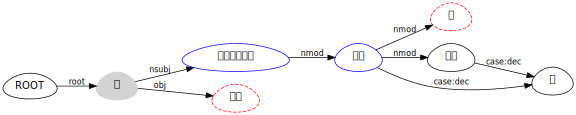

In [5]:
spa.graph('你北京的公司的主要传真号码是什么')

In [7]:
print(doc.ents)

(北京,)
